<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Prac2Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRERIAS mlxtend o apyori

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from mlxtend.frequent_patterns import apriori, association_rules

#pip install mlxtend  

In [117]:
data = pd.read_csv('BlackFriday.csv', encoding='UTF-8')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [118]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [119]:
data.isnull().values.any() 

True

Vemos en que columnas hay NA's

In [120]:
data.isna().sum()  

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Como más de la mitad de las filas de Product Category 3 son NA's eliminamos esta columna

In [121]:
data = data.drop(['Product_Category_3'], axis=1)

Vemos si hay algún dato duplicado

In [122]:
if any(data.duplicated()):
  print("Hay datos duplicados")
else:
  print("No hay datos duplicados")

No hay datos duplicados


- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [123]:
data.loc[(data['Gender'] == 'M'),'Male'] = True
data.loc[(data['Gender'] == 'F'),'Male'] = False
data.loc[(data['Gender'] == 'F'),'Female'] = True
data.loc[(data['Gender'] == 'M'),'Female'] = False

data.loc[(data['Age'] != '0-17'), 'Menores'] = False
data.loc[(data['Age'] == '0-17'), 'Menores'] = True
data.loc[(data['Age'] != '18-25'), 'Uni'] = False
data.loc[(data['Age'] == '18-25'), 'Uni'] = True
data.loc[(data['Age'] != '26-35'), 'PostUni'] = False
data.loc[(data['Age'] == '26-35'), 'PostUni'] = True
data.loc[(data['Age'] != '36-45'), 'Medio'] = False
data.loc[(data['Age'] == '36-45'), 'Medio'] = True
data.loc[(data['Age'] != '46-50'), 'Mayor'] = False
data.loc[(data['Age'] == '46-50'), 'Mayor'] = True
data.loc[(data['Age'] != '50-55'), 'PreJubi'] = False
data.loc[(data['Age'] == '50-55'), 'PreJubi'] = True
data.loc[(data['Age'] != '55+'), 'Jubi'] = False
data.loc[(data['Age'] == '55+'), 'Jubi'] = True



data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Male,Female,Menores,Uni,PostUni,Medio,Mayor,PreJubi,Jubi
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,True,False,False,False,False,False,True,False,False
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,True,False,False,False,True,False,False,False,False
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,False,True,False,False,False,True,False,False,False
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,False,True,False,False,False,True,False,False,False
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,False,True,False,False,True,False,False,False,False


Colocamos los datos de la forma indicada para poder calcular las frecuencias de estos más adelante

In [124]:
data1 = pd.DataFrame(data,columns=['User_ID','Male','Female','Menores','Uni','PostUni','Medio','Mayor','PreJubi','Jubi']).set_index('User_ID')
data1.head()

,Male,Female,Menores,Uni,PostUni,Medio,Mayor,PreJubi,Jubi
User_ID,,,,,,,,,
1000004,True,False,False,False,False,False,True,False,False
1000009,True,False,False,False,True,False,False,False,False
1000010,False,True,False,False,False,True,False,False,False
1000010,False,True,False,False,False,True,False,False,False
1000011,False,True,False,False,True,False,False,False,False


- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.
(1 punto)

IR VARIANDO EL MIN_SUPPORT HASTA QUE SALE UN NÚMERO DE REGLAS RAZONABLE

In [142]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(data1, min_support=0.001, use_colnames=True)
frequent_itemsets_sort = frequent_itemsets.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_sort.support*len(data1)
frequent_itemsets_sort['frecuencia'] =frequent
frequent_itemsets_sort.head()

,support,itemsets,frecuencia
0,0.752452,(Male),175772.0
4,0.39995,(PostUni),93428.0
10,0.30715,"(PostUni, Male)",71750.0
1,0.247548,(Female),57827.0
5,0.199962,(Medio),46711.0


In [143]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(data1, min_support=0.06, use_colnames=True)
frequent_itemsets_sort = frequent_itemsets.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_sort.support*len(data1)
frequent_itemsets_sort['frecuencia'] =frequent
frequent_itemsets_sort.head()

,support,itemsets,frecuencia
0,0.752452,(Male),175772.0
3,0.39995,(PostUni),93428.0
7,0.30715,"(PostUni, Male)",71750.0
1,0.247548,(Female),57827.0
4,0.199962,(Medio),46711.0


-   ¿Qué   tipo   reglas   desaparecen   según   la   configuración   y   categorías   ( género,   edad   y   tipo   de   producto)
consideradas? ¿Por qué? (1 punto)

2 TIPOS DE CLASIFICAR REGLAS SEGÚN SU CONFIGURACIÓN:

1- SEGÚN SU CONFIANZA 

CONFIZANZA= SOPORTE(1) / SOPORTE(1,2)

2- SEGÚN SU LIFT 
  
LIFT = CONFIANZA / SOPORTE

3 TIPOS DE CLASIFICAR REGLAS SEGÚN SU CATEGORÍA:

1- GÉNERO
2- EDAD
3- TIPO DE PRODUCTO

1- SEGÚN SU CONFIANZA

In [126]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
rules_sort = rules.sort_values(by=['confidence'], ascending=False)
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PostUni),(Male),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
0,(Uni),(Male),0.181050,0.752452,0.136362,0.753174,1.000960,0.000131,1.002927
2,(Medio),(Male),0.199962,0.752452,0.149915,0.749716,0.996365,-0.000547,0.989070
3,(Mayor),(Male),0.083806,0.752452,0.060064,0.716708,0.952497,-0.002996,0.873828


In [127]:
rules_maximales = rules [max(rules)]
rules_maximales.head()

0    0.136362
1    0.307150
2    0.149915
3    0.060064
Name: support, dtype: float64

2- SEGÚN SU LIFT

In [128]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.6)
rules_sort = rules.sort_values(by=['lift'], ascending=False)
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(PostUni),(Male),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
3,(Male),(PostUni),0.752452,0.399950,0.307150,0.408199,1.020625,0.006207,1.013939
0,(Uni),(Male),0.181050,0.752452,0.136362,0.753174,1.000960,0.000131,1.002927
1,(Male),(Uni),0.752452,0.181050,0.136362,0.181223,1.000960,0.000131,1.000212
4,(Medio),(Male),0.199962,0.752452,0.149915,0.749716,0.996365,-0.000547,0.989070


In [129]:
rules_maximales = rules [max(rules)]
rules_maximales.head()

0    0.136362
1    0.136362
2    0.307150
3    0.307150
4    0.149915
Name: support, dtype: float64

-   Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas
  que   
  te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   
un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold.  
Justifica los resultados. (1 punto)

In [141]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.4)
rules_sort = rules.sort_values(by=['lift'], ascending=False)
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(PostUni),(Male),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
3,(Male),(PostUni),0.752452,0.399950,0.307150,0.408199,1.020625,0.006207,1.013939
0,(Uni),(Male),0.181050,0.752452,0.136362,0.753174,1.000960,0.000131,1.002927
1,(Male),(Uni),0.752452,0.181050,0.136362,0.181223,1.000960,0.000131,1.000212
4,(Medio),(Male),0.199962,0.752452,0.149915,0.749716,0.996365,-0.000547,0.989070


In [98]:
any(rules.duplicated())

False

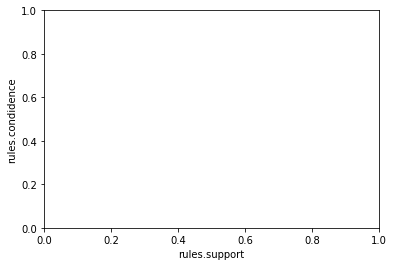

In [99]:
#plt.plot('rules')
plt.xlabel('rules.support')
plt.ylabel('rules.condidence')
plt.show()

In [100]:
#plt.plot(rules, method='graph', interactive=True)#, shading='NA')

Agrupamos los productos por usuario

In [101]:
Tabla_Usuario_Producto = data.groupby('User_ID')['Product_ID'].apply(','.join)
Tabla_Usuario_Producto

User_ID
1000001    P00259342,P00216342,P00157542,P00212942,P00070...
1000002    P00182742,P00102542,P00201442,P00303442,P00364...
1000003    P00025442,P00253142,P00319042,P00289942,P00148...
1000004                                            P00128942
1000005    P00081142,P00132642,P00223542,P00223642,P00108...
                                 ...                        
1006036    P00031042,P00162242,P00062942,P00112742,P00118...
1006037    P00058042,P00209842,P00115842,P00083842,P00059...
1006038    P00120542,P00316642,P00112142,P00131742,P00022...
1006039    P00291842,P00085842,P00019442,P00088242,P00188...
1006040    P00313342,P00179542,P00150042,P00129642,P00100...
Name: Product_ID, Length: 5891, dtype: object

Pasamos los productos a forma boleana

Si el usuario ha comprado ese producto True
sino False

In [102]:
Server_ID = data.groupby(['User_ID','Product_ID'])['Occupation'].sum().apply(lambda x: x>0).unstack().reset_index().fillna(False).set_index('User_ID')
Server_ID

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0099042,P0099142,P0099242,P0099342,P0099442,P0099542,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000005,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1006037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1006038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Itemset frecuentes para K==1 (Son los que tengan un soporte alto)

In [103]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(Server_ID, min_support=0.06, use_colnames=True)
frequent_itemsets_sort = frequent_itemsets.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_sort.support*len(Server_ID)
frequent_itemsets_sort['frecuencia'] =frequent
frequent_itemsets_sort.head()

,support,itemsets,frecuencia
39,0.124767,(P00265242),735.0
23,0.108810,(P00112142),641.0
2,0.105755,(P00025442),623.0
19,0.103208,(P00110742),608.0
8,0.099813,(P00046742),588.0


In [104]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


2) Para k≥2.

a. Mostrar los itemset frecuentes candidatos y su soporte.

In [105]:
Server_ID2 = data.groupby(['User_ID','Product_ID'])['Occupation'].sum().apply(lambda x: x>=2).unstack().reset_index().fillna(False).set_index('User_ID')
Server_ID2.head()

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0099042,P0099142,P0099242,P0099342,P0099442,P0099542,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000005,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3) Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes. CON 8 se para

In [106]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(Server_ID2, min_support=0.06, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.065354,(P00000142)
1,0.078764,(P00010742)
2,0.095230,(P00025442)
3,0.070446,(P00028842)
4,0.068919,(P00031042)


In [107]:
#Server_ID3 = data.groupby(['User_ID','Product_ID'])['Occupation'].sum().apply(lambda x: x>7).unstack().reset_index().fillna(False).set_index('User_ID')
#frequent_itemsets = apriori(Server_ID3, min_support=0.06, use_colnames=True)
#frequent_itemsets.head()

4) Mostrar todas las posibles reglas con la confianza de cada una de ellas.

In [108]:
#rules = association_rules(frq_items, metric ="lift", min_threshold = 0.8)
#rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


5) Listar todas las reglas que sean de alta confianza.

In [109]:
import inspect

rules_sort = rules.sort_values(by=['confidence'], ascending=False)
rules_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


A partir de lo anterior se pide:

- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.
(1 punto)

- ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos

-   Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas   que   te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold. Justifica los resultados. (1 punto)

In [110]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)#, target = "rules")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos (1 punto)

In [111]:
import inspect

inspect(sorted(x = rules, decreasing = True, by = 'confidence'))

TypeError: ignored

In [ ]:
#reglas_maximales <- reglas [is.maximal(reglas)]
rules_maximales = rules [max(rules)]
rules_maximales

In [ ]:
#reglas_redundantes <- reglas[is.redundant(x = reglas, measure = "confidence")]

rules.duplicated(keep=False)

In [ ]:
plt(rules)

In [ ]:
plt(rules, method='graph', 'interactive'=True, shading=NA)